In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from collections import deque
from sklearn.model_selection import train_test_split

## Load Data


In [13]:
data = pd.read_csv('data.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Missing Value finding


In [26]:
index = np.where(data.notnull() == False)
index

(array([ 32, 126, 330, 336, 354, 374], dtype=int64),
 array([3, 3, 3, 3, 3, 3], dtype=int64))

In [28]:
data.dropna(inplace=True)

In [30]:
index = np.where(data.notnull() == False)
index

(array([], dtype=int64), array([], dtype=int64))

In [31]:
X =data.drop(columns=['mpg','car name'],inplace=False).values
# y = data.iloc[:,0] ----> export = series ---> don't need (reshape)
y = data['mpg'].values

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3)

In [33]:
scaler_X = StandardScaler().fit(X_train)
scaler_Y = StandardScaler().fit(y_train.reshape(-1, 1))
X_train, X_test = scaler_X.fit_transform(X_train) , scaler_X.fit_transform(X_test)
y_train, y_test  = scaler_Y.fit_transform(y_train.reshape(-1, 1)) , scaler_Y.fit_transform(y_test.reshape(-1, 1))

### regression with SVR

In [59]:
from sklearn.svm import SVR

In [60]:
model = SVR()
model.fit(X_train,y_train)

C:\Users\Morteza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [38]:
y_pre_tr = model.predict(X_train)
y_pre_test = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
# print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error of train: %.2f" % mean_squared_error(y_train, y_pre_tr))
print("Mean squared error of test: %.2f" % mean_squared_error(y_test, y_pre_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pre_tr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pre_test))

Mean squared error of train: 0.09
Mean squared error of test: 0.13
Coefficient of determination: 0.91
Coefficient of determination: 0.87


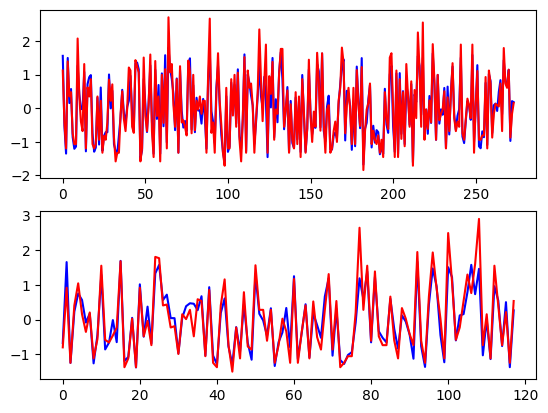

In [41]:
plt.subplot(211)
plt.plot(y_pre_tr, 'b')
plt.plot(y_train, 'r')
plt.subplot(212)
plt.plot(y_pre_test, 'b')
plt.plot(y_test, 'r')
plt.show()

### regression with SVR-linear

C:\Users\Morteza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error of train: 0.17
Mean squared error of test: 0.22
Coefficient of determination: 0.83
Coefficient of determination: 0.78


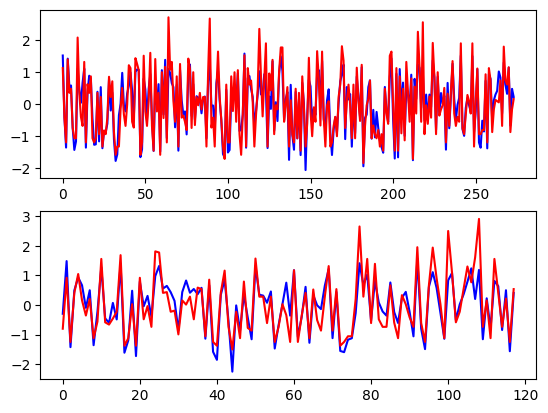

In [42]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pre_tr = model.predict(X_train)
y_pre_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
# print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error of train: %.2f" % mean_squared_error(y_train, y_pre_tr))
print("Mean squared error of test: %.2f" % mean_squared_error(y_test, y_pre_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pre_tr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pre_test))
plt.subplot(211)
plt.plot(y_pre_tr, 'b')
plt.plot(y_train, 'r')
plt.subplot(212)
plt.plot(y_pre_test, 'b')
plt.plot(y_test, 'r')
plt.show()

### regression with SVR-rbf

In [0]:
from sklearn.svm import SVR

model = SVR(kernel='rbf',C=5)
model.fit(X_train, y_train)
y_pre_tr = model.predict(X_train)
y_pre_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

#####  ضریب تنظیم که اضافه کردیم دقت مدل آموزش بالا رفت چون به داده آموزش سخت گرفت ولی باعث بیش برازشی شد.

C:\Users\Morteza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error of train: 0.06
Mean squared error of test: 0.13
Coefficient of determination: 0.94
Coefficient of determination: 0.87


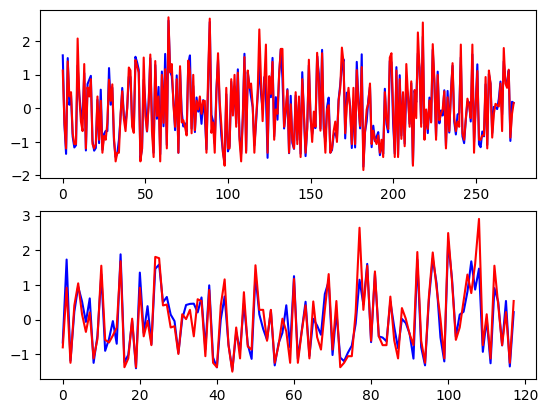

In [57]:

# The coefficients
# print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error of train: %.2f" % mean_squared_error(y_train, y_pre_tr))
print("Mean squared error of test: %.2f" % mean_squared_error(y_test, y_pre_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pre_tr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pre_test))
plt.subplot(211)
plt.plot(y_pre_tr, 'b')
plt.plot(y_train, 'r')
plt.subplot(212)
plt.plot(y_pre_test, 'b')
plt.plot(y_test, 'r')
plt.show()

### regression with SVR-poly

C:\Users\Morteza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error of train: 0.20
Mean squared error of test: 0.27
Coefficient of determination: 0.80
Coefficient of determination: 0.73


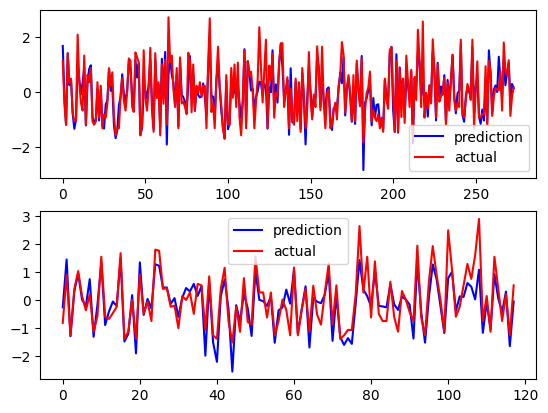

In [58]:
from sklearn.svm import SVR

model = SVR(kernel='poly',degree=3)
model.fit(X_train, y_train)
y_pre_tr = model.predict(X_train)
y_pre_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
# print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error of train: %.2f" % mean_squared_error(y_train, y_pre_tr))
print("Mean squared error of test: %.2f" % mean_squared_error(y_test, y_pre_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pre_tr))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pre_test))
plt.subplot(211)
plt.plot(y_pre_tr, 'b')
plt.plot(y_train, 'r')
plt.legend(['prediction','actual'])
plt.subplot(212)
plt.plot(y_pre_test, 'b')
plt.plot(y_test, 'r')
plt.legend(['prediction','actual'])
plt.show()